# Header

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from mpl_toolkits.mplot3d import Axes3D
import scipy as s
%matplotlib inline
#%matplotlib notebook

In [2]:
# Check directory
os.chdir("D:\Raphael\Dropbox\Mcgill\JupyterNotebook\PHYS512")
os.getcwd()

'D:\\Raphael\\Dropbox\\Mcgill\\JupyterNotebook\\PHYS512'

# Functions

In [3]:
# Generate random inital condition
def init_cond(n):
    x=np.random.rand(n,3)
    v=np.random.rand(n,3)*0
    m=np.ones(n)/n
    return x,v,m

In [87]:
# Define softened potential, given a density matrix shape
def soft_pot(rho,edge,a):
    pot =rho*0 #initialise potential matrix
    nx = len(rho[0]) # number of bins in x
    ny = len(rho[1])
    nz = len(rho[2])
    dx = edge[0][1]-edge[0][0] # size of bin in x
    dy = edge[1][1]-edge[1][0]
    dz = edge[2][1]-edge[2][0]
    centerx = (edge[0][-1]-edge[0][0])/2
    centery = (edge[1][-1]-edge[1][0])/2
    centerz = (edge[2][-1]-edge[2][0])/2
    for i in range(nx):
        for j in range(ny):
            for k in range(nz): # looking at some bin i,j,k
                x = (i+0.5)*dx-centerx # position of the center of the bin in x, given ptcl at x=0.5 (i.e at the center, since x=[0,1) )
                y = (j+0.5)*dy-centery
                z = (k+0.5)*dz-centerz
                r = np.sqrt(x**2+y**2+z**2) # distance btw center of bin and and particle
                if r**3<=a:
                    pot[i,j,k] = r/a # potential for bins close to ptcl
                else:
                    pot[i,j,k] = 1/r**2 # potential for bins far from ptcl
    return pot

In [95]:
# define function for easy visual check (thanks Marcus!)
def plot_2D_collapse(H,edges):
    edges_x = edges[0]
    edges_y = edges[1]
    edges_z = edges[2]
    fig,ax = plt.subplots(figsize=(10,10), dpi=100)
    ax.imshow(
        H.sum(axis=2),
        origin="lower",
        extent=(edges_y.min(), edges_y.max(), edges_x.min(), edges_x.max()), 
        aspect="auto")
    ax.set_xlabel("y")
    ax.set_ylabel("x")
    minor_ticks_x = edges_x
    minor_ticks_y = edges_y
    ax.set(xlim=(minor_ticks_y[0], minor_ticks_y[-1]), ylim=(minor_ticks_x[0], minor_ticks_x[-1]))
    ax.set_xticks(minor_ticks_y, minor=True)
    ax.set_yticks(minor_ticks_x, minor=True)
    plt.show

In [5]:
#Return a 3D plot of the given x
def plot_graph3D(x, title ="", scale_factor = 1,save=False, name = "fig",n = 0):
    #Create figure
    fig=plt.figure(figsize=(10,10))#Create 3D axes
    ax=Axes3D(fig) 
    ax.scatter(x[0], x[1], x[2], color="royalblue", marker=".",s=.02*scale_factor)
    ax.set_xlabel("x-coordinate",fontsize=14)
    ax.set_ylabel("y-coordinate",fontsize=14)
    ax.set_label("z-coordinate",fontsize=14)
    ax.set_title(title,fontsize=20)
    #ax.legend(loc="upper left",fontsize=14)
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])
    if save:
        plt.savefig('Pictures_Final_Project/{}{}.png'.format(name,n), dpi=100)
    plt.close(fig)

# Code

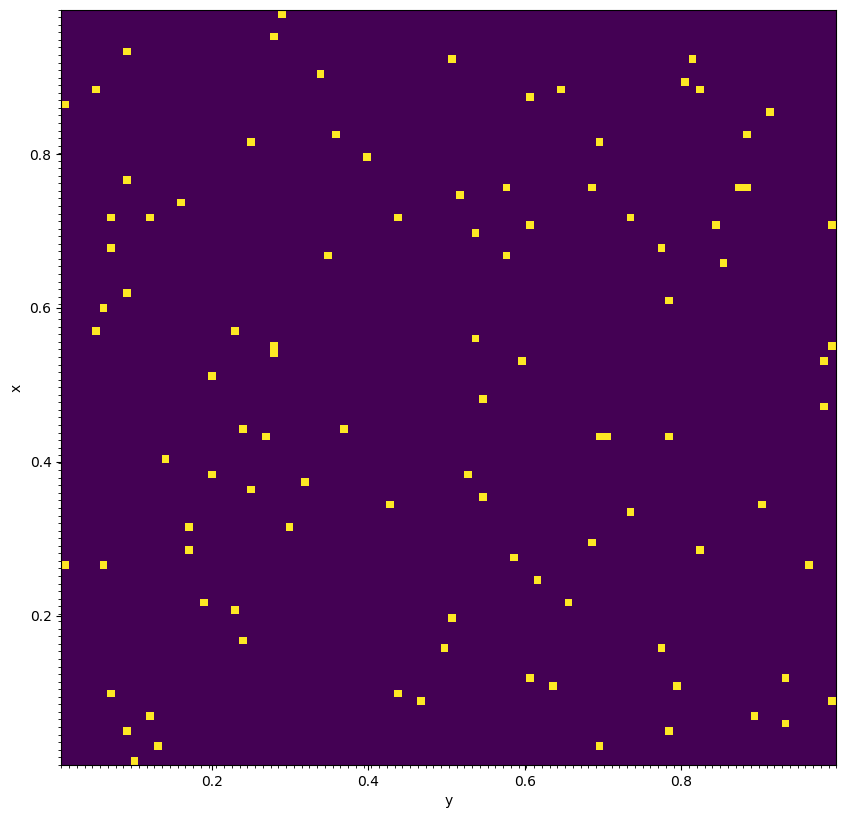

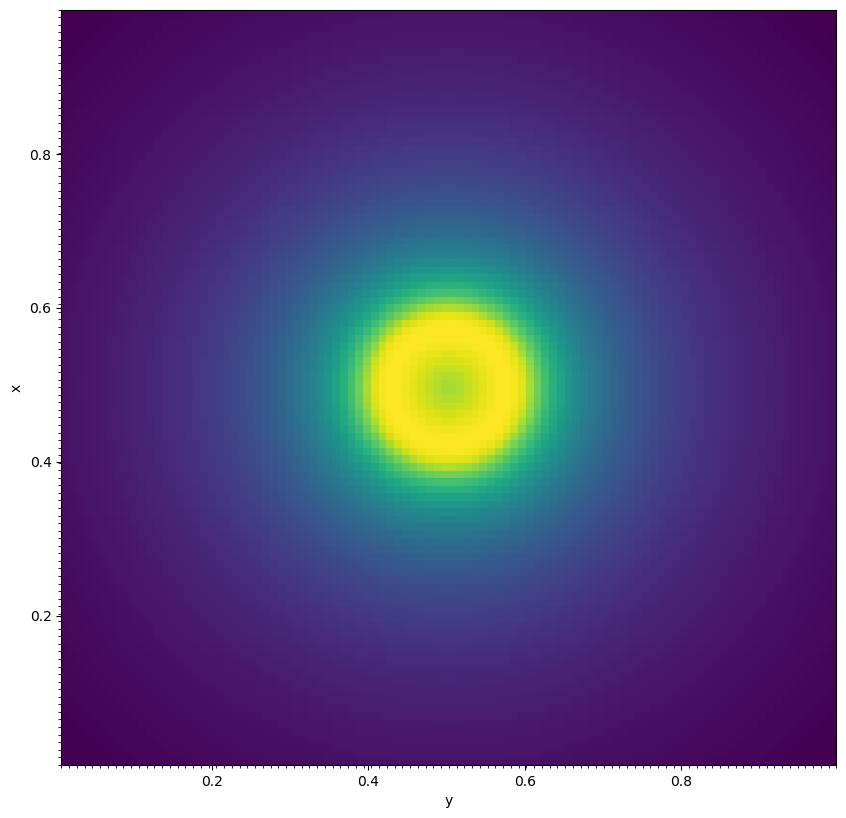

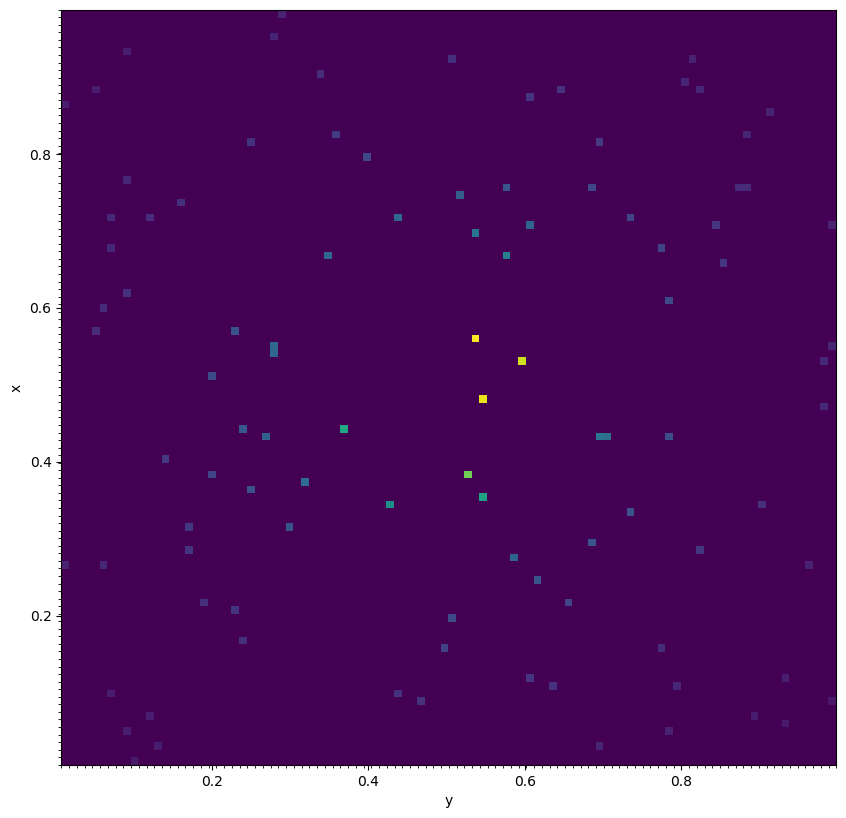

In [102]:
# initialise randomly for some n ptcls in a box size^3
n = 100
size = 100
x,v,m = init_cond(n)

# Create density matrix rho
rho,edge = np.histogramdd(x,bins=size)
plot_2D_collapse(rho,edge)

# Create softened potential matrix s_pot
s_pot = soft_pot(rho,edge,0.001)
plot_2D_collapse(s_pot,edge)

# Compute total potential matrix by convolving the density matrix with the softened potential
phi = s.ifft(s.fft(s_pot) * s.fft(rho))
plot_2D_collapse(phi.real,edge)

# Compute the acceleration matrix by taking the gradient of the potential
acc = np.gradient(phi)

# Define timestep
dt = 0.1

In [30]:
#x[ptcl,xyz]
#x_t[xyz,ptcl]